# Implementation of the classification model(s) and their validation (5 points) 

## • A Jupyter Notebook using the Python programming language is required. 

In [15]:
# Import libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

We want to initialize classifiers to use them later in the code.

In [ ]:
dt_classifier = DecisionTreeClassifier()
lr_classifier = LogisticRegression()
knn_classifier = KNeighborsClassifier()

Implementation for one og these models.

*clearly separating training and evaluation (using the train/test sets as deemed appropriate).*

Train and evaluate model - whit parametre classifer and the axes to the models.

In [8]:
def train_model(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)

def evaluate_model(classifier, X_test, y_test):
    accuracy = classifier.score(X_test, y_test)
    return accuracy


The function loads images from a folder structure based on the given path and returns them as numpy arrays along with their corresponding labels. 

It uses OpenCV to read the images from the file system.

In [10]:
# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
            labels.append(os.path.basename(folder))
    return np.array(images), np.array(labels)

Define the path for the folders.

In [11]:
# Define folder paths
folder_paths = {
    "AnnualCrop": "images/AnnualCrop",
    "Forest": "images/Forest",
    "HerbaceousVegetation": "images/HerbaceousVegetation",
    "Highway": "images/Highway",
    "Industrial": "images/Industrial",
    "Pasture": "images/Pasture",
    "PermanentCrop": "images/PermanentCrop",
    "Residential": "images/Residential",
    "River": "images/River",
    "SeaLake": "images/SeaLake"
}

This code loads ALL the images (jpg files) from multiple folders in 'images' folder, each representing a different class, and stores them along with their labels. 

It then converts the data into numpy arrays and flattens the images for further processing.

In [12]:
# Load images from each folder
all_images = []
all_labels = []
for class_name, folder_path in folder_paths.items():
    print("Loading images from folder:", folder_path)
    images, labels = load_images_from_folder(folder_path)
    all_images.extend(images)
    all_labels.extend(labels)

# Make arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Flatten images
all_images_flat = all_images.reshape(all_images.shape[0], -1)

Loading images from folder: images/AnnualCrop
Loading images from folder: images/Forest
Loading images from folder: images/HerbaceousVegetation
Loading images from folder: images/Highway
Loading images from folder: images/Industrial
Loading images from folder: images/Pasture
Loading images from folder: images/PermanentCrop
Loading images from folder: images/Residential
Loading images from folder: images/River
Loading images from folder: images/SeaLake


On these two lines, a training and test split of the data is created, with 80% used for training and 20% *(test_size=0.2 == 20% - leaves 80% to the training set)* for testing. 

Then, a decision tree classifier is trained on the training data and used to predict the classes for the test data.



In [18]:
# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(all_images_flat, all_labels, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [16]:
# Evalaluation for the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
                      precision    recall  f1-score   support

          AnnualCrop       0.44      0.45      0.45       595
              Forest       0.75      0.74      0.74       603
HerbaceousVegetation       0.35      0.38      0.37       609
             Highway       0.21      0.21      0.21       505
          Industrial       0.56      0.49      0.52       488
             Pasture       0.47      0.50      0.49       413
       PermanentCrop       0.27      0.28      0.28       503
         Residential       0.40      0.34      0.37       593
               River       0.42      0.39      0.40       498
             SeaLake       0.70      0.81      0.75       593

            accuracy                           0.47      5400
           macro avg       0.46      0.46      0.46      5400
        weighted avg       0.46      0.47      0.46      5400

Confusion Matrix:
[[268   6  52  63  27  20  78  29  25  27]
 [  6 447  14  14   0  31   3   1  20  67]
 [

### Visualize confusion matrix

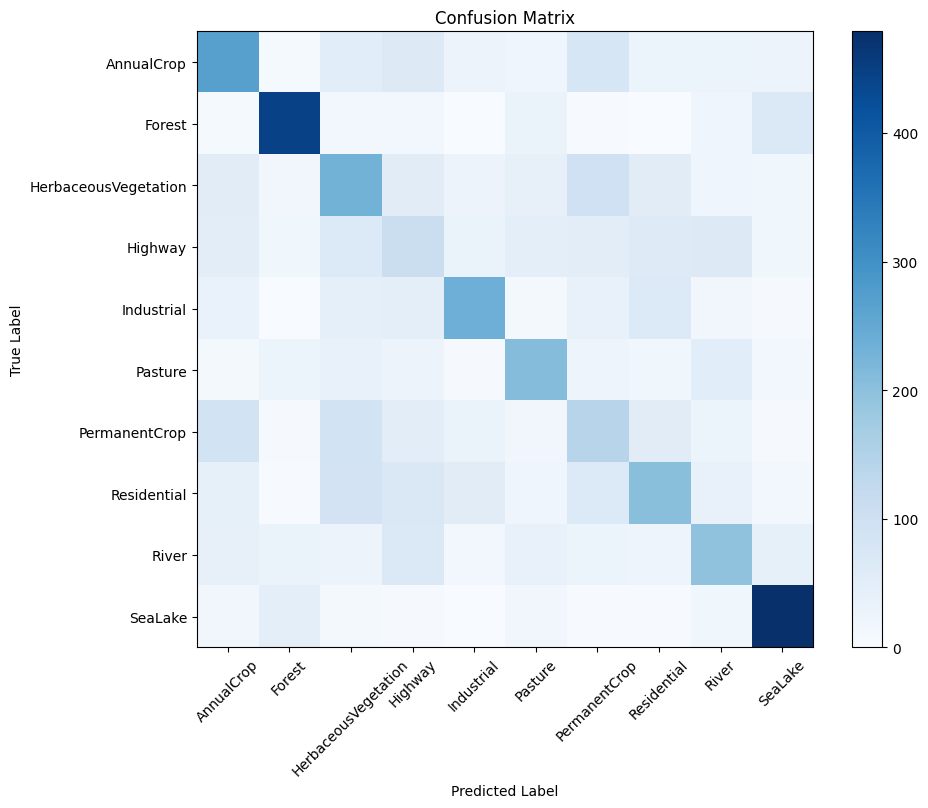

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='pink')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(folder_paths)), folder_paths.keys(), rotation=45)
plt.yticks(np.arange(len(folder_paths)), folder_paths.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()